# Library

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC, SVR

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

# Support Vector Machine
<center><img src="https://kr.mathworks.com/discovery/support-vector-machine/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1718266591845.jpg" alt="Support Vector Machine" width="400"></center>

회귀 분석 기법으로 데이터를 분류하기 위해 최적의 결정 경계를 찾는 데 중점을 둔 알고리즘

<br>

결정 경계(Decision Boundary): 데이터를 분류를 위한 경계. 두 클래스 간의 거리를 최대화하는 평면 또는 초평면(hyperplane)을 찾는 것을 목적으로 함  
서포트 벡터(Support Vectors): 결정 경계를 정의하는 사용하는 포인트 

<br>

SVM은 결정 경계가 각 클래스의 서포트 벡터에서 최대한 멀어지도록 하여 마진(margin)을 최대화하는 것을 목표로 함 <br>
이 과정은 선형 또는 비선형 최적화 문제로 해결 <br>

## 마진은 서로다른 클래스간의 거리 

## Margin

<left><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*RgFWpCEG5AvnmGF5ESy1Tg.png" alt="Linear" width="700"></left>

결정 경계 결정 시 허용할 수 있는 오차의 정도

<br>

<font style="font-size:20px"> Hard Margin </font>
- 결정 경계: 데이터 포인트가 결정 경계에 대해 오차가 없는 것을 전제. 즉, 모든 데이터 포인트가 결정 경계의 마진 바깥쪽에 위치
- 제약 조건: 데이터 포인트가 마진 내에 위치하는 것을 허용 않음

<br>

<font style="font-size:20px"> Soft Margin </font>
- 결정 경계: 데이터 포인트가 결정 경계의 마진 내에 위치할 수 있도록 허용 <br>
    -> 일부 데이터 포인트는 마진을 침범하거나 심지어 결정 경계의 잘못된 쪽에 위치할 수 있음
- 제약 조건 및 페널티: C라는 하이퍼파라미터를 사용하여 마진 침범을 허용하면서도 이를 최소화. C는 마진 침범의 비용을 조절하는 데 사용
    - C가 크면 마진 침범에 대한 페널티가 커지며, 모델은 훈련 데이터에 더 잘 적합, overfitting 가능성 높아짐
    - C가 작으면 모델은 더 많은 마진 침범을 허용하지만 일반화 능력 향상

<br>

<left><img src="https://velog.velcdn.com/images/cyeongy/post/a985a0b0-66e8-41a5-8a69-42a0c4e1dd2f/image.png" alt="Margin according to C" width="800"></left>

## 장단점

<font style="font-size:20px"> 장점 </font>
- 준수한 성능
- 저차원, 고차원 공간의 적은 데이터에 대해서 일반화 능력이 우수
- noise에 대해 유연한 처리 가능

<br>

<font style="font-size:20px"> 단점 </font>
- 커널함수 선택이 명확하지 않음
- 하이퍼파라미터 튜닝에 성능 의존
- 계산량 부담이 있음
- 비선형 커널의 결정경계 해석이 어려움

## 선형 vs 비선형
<left><img src="https://postfiles.pstatic.net/MjAxNzA3MTRfMjAx/MDAxNTAwMDE4MjQ4Nzcz.X-FIB1JxqpSuEFCh6LGXqA38XCMbyqL7wAxVbYu9rgQg.f-D7aYqoRV3euUacKBF4quD0fgm16wBqtf248W2Qs4og.PNG.tjdudwo93/1.png?type=w3" alt="Linear" width="400"></left>

선형 SVM: 데이터가 선형적으로 구분 가능한 경우 사용. <br>
-> 직선(2D)이나 평면(3D) 등으로 데이터를 완벽하게 나눌 수 있을 때 적용

<br>

|Before|After|
|------|-----|
|<left><img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FJbP8O%2FbtqX1piAirw%2FiZXk1KdP4MK6KZPUieGdKK%2Fimg.png" alt="Non Linaer" width="300"></left>|<left><img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FclNJlg%2FbtqYbIVGvcr%2F7kK4Ncjvxx9JV2DpDRvjn1%2Fimg.png" alt="Non Linaer" width="300"></left>|

<left><img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbknXqQ%2FbtqYbJG7bTI%2F8QoZFpvzAtUUy3yN5uRC9k%2Fimg.png" alt="2D result" width="650"></left>

비선형 SVM: 데이터가 선형적으로 구분되지 않는 경우, 커널 트릭(kernel trick)을 사용하여 데이터의 차원을 증가시켜 비선형 경계 학습. <br>
-> 커널 함수는 원래의 입력 공간을 고차원으로 매핑하여 비선형 문제를 선형 문제로 변환

ex) $ x = \{x_1, x_2\} \rightarrow z = \{x_1^2, \sqrt{2}x_1x_2, x_2^2\} $


### Kernel의 종류

<font style="font-size:20px"> Linear </font>

- $K(x, y) = x^T \cdot y$
- 선형 결정 경계를 만들 때 사용

<br>

<font style="font-size:20px"> Polynomial </font>

<left><img src="https://www.researchgate.net/profile/Asa-Ben-Hur/publication/41896604/figure/fig10/AS:667041182785544@1536046419481/The-effect-of-the-degree-of-a-polynomial-kernel-Higher-degree-polynomial-kernels-allow.png" alt="polynomial kernel" width="700"></left>

- $K(x, y) = (\gamma x^T \cdot y + \theta)^d$
- 입력 데이터를 고차원으로 매핑하며, 비선형 결정 경계를 만들 때 사용
- $\gamma, \theta, d$: hyperparameter

<br>

<font style="font-size:20px"> Radial Basis Function (RBF) </font>

<left><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*kO_kAQ32-qmT-iljdZdkrQ.png" alt="rbf kernel" width="600"></left>

- $K(x, y) = \exp(-\frac{|x-y|^2}{2\sigma^2})$
- 입력 데이터를 고차원으로 매핑하며, 복잡한 비선형 결정 경계를 만들 때 사용
- $\sigma$: hyperparameter

<br>

<font style="font-size:20px"> Sigmoid </font>

<left><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_005.png" alt="kernels" width="500"></left>

- $K(x, y) = \tanh(\gamma x^T \cdot y + \theta)$
- 입력 데이터를 고차원으로 매핑하며, 비선형 결정 경계를 만들 때 사용
- $\gamma, \theta$: hyperparameter

<br>


<left><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*N1x2IH92w_YDeUIj" alt="kernels" width="600" style="background-color:white"></left>


## 사용 방법

```python
```

<font style="font-size:20px"> 사용 방법 </font>

> ```python
> from sklearn.svm import SVC
> 
> # linear
> svm = SVC(kernel='linear').fit(X)
> # polynomial
> svm = SVC(kernel='poly', degree, gamma, coef0).fit(X)
> # RBF
> svm = SVC(kernel='rbf', gamma).fit(X)
> # simoid
> svm = SVC(kernel='sigmoid', gamma, coef0).fit(X)
> 
>
> svm.predict(X) # 학습된 특징을 바탕으로 새로운 데이터에 대해 예측
> ```

- Hyperparameters
    - C: 오차의 허용 정도
    - $\gamma$: 비선형 커널에서 데이터 포인트가 커널의 영향력을 결정하는 데 사용하며 $\gamma$ 가 클수록 데이터 포인트의 영향이 좁아짐
    - $\theta$: 커널의 비선형성과 다항식의 영향을 조절하는 데 사용되며, 값이 커질수록 비선형 항이 더 강조
    - degree: polynoimal kernel의 차원 결정


<font style="font-size:17px"> $\gamma$ </font>

<left><img src="https://velog.velcdn.com/images/cyeongy/post/361a529e-cf86-422c-ae34-03e8cdc67712/image.png" alt="gamma" width="600"></left>

- 곡률의 크기를 결정
- 감마 값이 커질수록 학습 데이터에 있는 모든 변수를 집단에 넣으려고함

<br>

## Support Vector Regression

<left><img src="https://www.saedsayad.com/images/SVR_2.png" alt="svr" width="600"></left>

분류 문제와 비슷하나 marign 내에 최대한 많은 데이터가 들어오도록 학습

<font style="font-size:20px"> 사용 방법 </font>

> ```python
> from sklearn.svm import SVR
> 
> # linear
> svr = SVR(kernel='linear').fit(X)
> # polynomial
> svr = SVR(kernel='poly', degree, gamma, coef0).fit(X)
> # RBF
> svr = SVR(kernel='rbf', gamma).fit(X)
> # simoid
> svr = SVR(kernel='sigmoid', gamma, coef0).fit(X)
> 
>
> svr.predict(X) # 학습된 특징을 바탕으로 새로운 데이터에 대해 예측
> ```

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svm = SVC(kernel='linear').fit(X)
> # polynomial
> svm = SVC(kernel='poly', degree, gamma, coef0).fit(X)
> # RBF
> svm = SVC(kernel='rbf', gamma).fit(X)
> # simoid
> svm = SVC(kernel='sigmoid', gamma, coef0).fit(X)
> 
>
> svm.predict(X)

In [8]:
penguin = sns.load_dataset('penguins')

In [9]:
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [20]:
penquins = sns.load_dataset('penguins').dropna()
print(penquins.shape)

penquins = penquins.drop_duplicates()
print(penquins)

(333, 7)
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female

In [21]:
char_to_index = dict(zip(penquins.species.unique(),range(3)))
penquins.species = penquins.species.apply(lambda x: char_to_index.get(x))
penquins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0,Torgersen,40.3,18.0,195.0,3250.0,Female
4,0,Torgersen,36.7,19.3,193.0,3450.0,Female
5,0,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2,Biscoe,47.2,13.7,214.0,4925.0,Female
340,2,Biscoe,46.8,14.3,215.0,4850.0,Female
341,2,Biscoe,50.4,15.7,222.0,5750.0,Male
342,2,Biscoe,45.2,14.8,212.0,5200.0,Female


In [22]:
penquins = penquins.dropna()

In [23]:
penquins.iloc[:, 1:]

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Biscoe,45.2,14.8,212.0,5200.0,Female


In [24]:
penquins = penquins.drop(columns=['island', 'sex'], axis=1)
penquins

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,39.1,18.7,181.0,3750.0
1,0,39.5,17.4,186.0,3800.0
2,0,40.3,18.0,195.0,3250.0
4,0,36.7,19.3,193.0,3450.0
5,0,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,2,47.2,13.7,214.0,4925.0
340,2,46.8,14.3,215.0,4850.0
341,2,50.4,15.7,222.0,5750.0
342,2,45.2,14.8,212.0,5200.0


In [25]:
penquins

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,39.1,18.7,181.0,3750.0
1,0,39.5,17.4,186.0,3800.0
2,0,40.3,18.0,195.0,3250.0
4,0,36.7,19.3,193.0,3450.0
5,0,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,2,47.2,13.7,214.0,4925.0
340,2,46.8,14.3,215.0,4850.0
341,2,50.4,15.7,222.0,5750.0
342,2,45.2,14.8,212.0,5200.0


In [3]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#train, test = train_test_split(penquins, test_size=0.3)
#svc = SVC(kernel='linear').fit(train.iloc[:, 1:], train.iloc[:, 0])

In [28]:
(svc.predict(test.drop(columns = ['species'])) == test.species.values).mean() # 모델성능확인Q

0.99

Text(50.722222222222214, 0.5, 'Ground Truth')

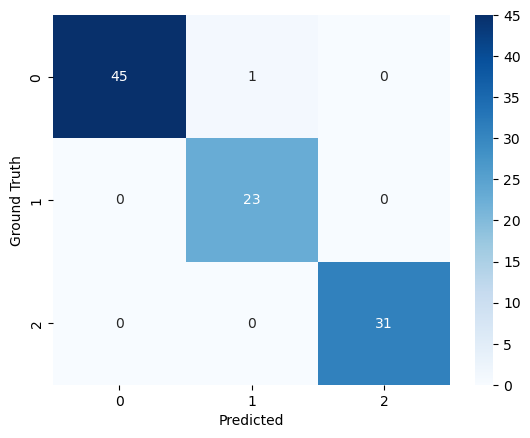

In [29]:
sns.heatmap(
    confusion_matrix(
        test.species.values,
        svc.predict(test.drop(columns = ['species']))
    ),
    annot=True,
    cmap='Blues'
)

plt.xlabel('Predicted')
plt.ylabel('Ground Truth')


In [30]:
import tqdm

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components= 2)
temp = tsne.fit_transform(penquins.iloc[:, 2:-1])
temp = pd.DataFrame(temp, columns=['tsne1', 'tsne2'])
temp = pd.concat([temp, penquins.filter(items=['species'])], axis=1)

In [35]:
px.scatter(
    temp,
    x = 'tsne1',
    y = 'tsne2',
    color= 'species'
)

In [43]:
train, test = train_test_split(penquins, test_size=0.3)

In [44]:
train.iloc[:, :]

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
78,0,36.2,16.1,187.0,3550.0
293,2,46.5,14.8,217.0,5200.0
290,2,47.7,15.0,216.0,4750.0
295,2,48.6,16.0,230.0,5800.0
2,0,40.3,18.0,195.0,3250.0
...,...,...,...,...,...
204,1,45.7,17.3,193.0,3600.0
320,2,48.5,15.0,219.0,4850.0
80,0,34.6,17.2,189.0,3200.0
45,0,39.6,18.8,190.0,4600.0


In [45]:
results = {}

for kernel in  ('linear', 'poly', 'rbf', 'sigmoid'):
    svm = SVC(kernel=kernel)
    svm.fit(train.iloc[:, 1:], train.iloc[:, 0])
    result = svm.predict(test.iloc[:, 1:])
    mean = (result == test.iloc[:, 0]).mean()

    results.update({kernel:mean})



In [46]:
results

{'linear': 0.99, 'poly': 0.79, 'rbf': 0.78, 'sigmoid': 0.13}

In [36]:
np.arange(0.1, 5, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [47]:
results = {}

for gamma in  np.arange(0.1, 5, 0.5):
    svm = SVC(kernel='poly', gamma= gamma)
    svm.fit(train.iloc[:, 1:], train.iloc[:, 0])
    result = svm.predict(test.iloc[:, 1:])
    mean = (result == test.iloc[:, 0]).mean()

    results.update({gamma :mean})



In [52]:
results

{1: 0.78,
 2: 0.78,
 3: 0.79,
 4: 0.79,
 5: 0.79,
 6: 0.79,
 7: 0.79,
 8: 0.79,
 9: 0.79,
 10: 0.79}

In [51]:
results = {}

for degree in  range(1, 11):
    svm = SVC(kernel='poly', degree=degree)
    svm.fit(train.iloc[:, 1:], train.iloc[:, 0])
    result = svm.predict(test.iloc[:, 1:])
    mean = (result == test.iloc[:, 0]).mean()

    results.update({degree:mean})

results



{1: 0.78,
 2: 0.78,
 3: 0.79,
 4: 0.79,
 5: 0.79,
 6: 0.79,
 7: 0.79,
 8: 0.79,
 9: 0.79,
 10: 0.79}

In [50]:
results = {}

for coef in  np.arange(0.1, 10, 0.5):
    svm = SVC(kernel='poly', coef0= coef)
    svm.fit(train.iloc[:, 1:], train.iloc[:, 0])
    result = svm.predict(test.iloc[:, 1:])
    mean = (result == test.iloc[:, 0]).mean()

    results.update({coef:mean})

results



{0.1: 0.79,
 0.6: 0.79,
 1.1: 0.79,
 1.6: 0.8,
 2.1: 0.79,
 2.6: 0.79,
 3.1: 0.79,
 3.6: 0.79,
 4.1: 0.8,
 4.6: 0.8,
 5.1: 0.8,
 5.6: 0.8,
 6.1: 0.8,
 6.6: 0.8,
 7.1: 0.8,
 7.6: 0.8,
 8.1: 0.79,
 8.6: 0.79,
 9.1: 0.79,
 9.6: 0.8}

In [ ]:

from sklearn.svm import SVR

# linear
svr = SVR(kernel='linear').fit(X)
# polynomial
svr = SVR(kernel='poly', degree, gamma, coef0).fit(X)
# RBF
svr = SVR(kernel='rbf', gamma).fit(X)
# simoid
svr = SVR(kernel='sigmoid', gamma, coef0).fit(X)

svr.predict(X) # 학습된 특징을 바탕으로 새로운 데이터에 대해 예측

In [4]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [33]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [5]:
char_to_index = dict(zip(tips.smoker.unique(),range(2))) # 0이면 no
tips.smoker = tips.smoker.apply(lambda x: char_to_index.get(x))
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,0,Sat,Dinner,2


In [6]:
char_to_index = dict(zip(tips.sex.unique(),range(2))) # 0이면 female
tips.sex = tips.sex.apply(lambda x: char_to_index.get(x))
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,0,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,Dinner,3
240,27.18,2.00,0,1,Sat,Dinner,2
241,22.67,2.00,1,1,Sat,Dinner,2
242,17.82,1.75,1,0,Sat,Dinner,2


In [7]:
char_to_index = dict(zip(tips.time.unique(),range(2))) # 0이면 Dinner
tips.time = tips.time.apply(lambda x: char_to_index.get(x))
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,0,2
1,10.34,1.66,1,0,Sun,0,3
2,21.01,3.50,1,0,Sun,0,3
3,23.68,3.31,1,0,Sun,0,2
4,24.59,3.61,0,0,Sun,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,0,3
240,27.18,2.00,0,1,Sat,0,2
241,22.67,2.00,1,1,Sat,0,2
242,17.82,1.75,1,0,Sat,0,2


In [8]:
char_to_index = dict(zip(tips.day.unique(),range(4))) # 0이면 female
tips.day = tips.day.apply(lambda x: char_to_index.get(x))
tips['target'] = tips['tip']
tips = tips.drop('tip', axis=1)

In [55]:
tips

,total_bill,sex,smoker,day,time,size,target
0,16.99,0,0,0,0,2,1.01
1,10.34,1,0,0,0,3,1.66
2,21.01,1,0,0,0,3,3.50
3,23.68,1,0,0,0,2,3.31
4,24.59,0,0,0,0,4,3.61
...,...,...,...,...,...,...,...
238,29.03,1,0,1,0,3,5.92
239,27.18,0,1,1,0,2,2.00
240,22.67,1,1,1,0,2,2.00
241,17.82,1,0,1,0,2,1.75


In [9]:
tips.duplicated().sum()
tips = tips.drop_duplicates().reset_index(drop=True)
from sklearn.svm import SVR

In [71]:
from sklearn.svm import SVR

train, test = train_test_split(tips, test_size= 0.3)
svr = SVR(kernel='linear').fit(train.iloc[:, :-1], train.iloc[:, -1])

In [58]:
tips.iloc[:, :-1]

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,0,0,2
1,10.34,1,0,0,0,3
2,21.01,1,0,0,0,3
3,23.68,1,0,0,0,2
4,24.59,0,0,0,0,4
...,...,...,...,...,...,...
238,29.03,1,0,1,0,3
239,27.18,0,1,1,0,2
240,22.67,1,1,1,0,2
241,17.82,1,0,1,0,2


In [59]:
tips

,total_bill,sex,smoker,day,time,size,target
0,16.99,0,0,0,0,2,1.01
1,10.34,1,0,0,0,3,1.66
2,21.01,1,0,0,0,3,3.50
3,23.68,1,0,0,0,2,3.31
4,24.59,0,0,0,0,4,3.61
...,...,...,...,...,...,...,...
238,29.03,1,0,1,0,3,5.92
239,27.18,0,1,1,0,2,2.00
240,22.67,1,1,1,0,2,2.00
241,17.82,1,0,1,0,2,1.75


In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
temp = pca.fit_transform(tips.iloc[:, :-1])
temp = pd.DataFrame(temp, columns=['pca1', 'pca2'])
temp = pd.concat([temp, tips.filter(items=['target'])], axis=1)

px.scatter(
    temp,
    x = 'pca1',
    y = 'pca2',
    color= 'target'
)

In [72]:
(svr.predict(test.drop(columns = ['target'])) == test.target.values).mean() 

0.0

In [10]:
train, test = train_test_split(tips, test_size= 0.3)

In [16]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(train.filter(items=['total_bill', 'size', 'target']))

MinMaxScaler()

In [18]:
train_scale = minmax_scaler.transform(train.filter(items=['total_bill', 'size', 'target']))
test_scale = minmax_scaler.transform(test.filter(items=['total_bill', 'size', 'target']))

In [31]:
n_train = train.filter(items=['total_bill', 'size', 'target'])
n_train.loc[:] = train_scale

n_test = test.filter(items=['total_bill', 'size', 'target'])
n_test.loc[:] = test_scale

In [30]:
n_train

,total_bill,size,target
130,0.335358,0.2,0.055556
210,0.478006,0.6,0.462222
110,0.228948,0.2,0.222222
225,0.147047,0.2,0.111111
179,0.661081,0.2,0.283333
...,...,...,...
152,0.297235,0.4,0.193333
29,0.347298,0.2,0.222222
93,0.277545,0.2,0.366667
92,0.056137,0.2,0.000000


In [11]:
train

,total_bill,sex,smoker,day,time,size,target
130,19.08,1,0,2,1,2,1.50
210,25.89,1,1,1,0,4,5.16
110,14.00,1,0,1,0,2,3.00
225,10.09,0,1,3,1,2,2.00
179,34.63,1,1,0,0,2,3.55
...,...,...,...,...,...,...,...
152,17.26,1,0,0,0,3,2.74
29,19.65,0,0,1,0,2,3.00
93,16.32,0,1,3,0,2,4.30
92,5.75,0,1,3,0,2,1.00


In [15]:
test

,total_bill,sex,smoker,day,time,size,target
231,11.61,1,0,1,0,2,3.39
35,24.06,1,0,1,0,3,3.60
21,20.29,0,0,1,0,2,2.75
139,13.16,0,0,2,1,2,2.75
133,12.26,0,0,2,1,2,2.00
...,...,...,...,...,...,...,...
142,41.19,1,0,2,1,5,5.00
52,34.81,0,0,0,0,4,5.20
13,18.43,1,0,0,0,4,3.00
57,26.41,0,0,1,0,2,1.50


In [32]:
# svr = SVR(kernel='sigmoid', gamma, coef0).fit(X)

results = {}

for gamma in np.arange(0.1, 5, 0.5):
    svr = SVR(kernel='sigmoid', gamma = gamma)
    svr.fit(n_train.iloc[:, :-1], n_train.iloc[:, -1])
    result = svr.predict(n_test.iloc[:, :-1])
    mean = (result == n_test.iloc[:, -1]).mean()

    results.update({gamma : mean})

results

{0.1: 0.0,
 0.6: 0.0,
 1.1: 0.0,
 1.6: 0.0,
 2.1: 0.0,
 2.6: 0.0,
 3.1: 0.0,
 3.6: 0.0,
 4.1: 0.0,
 4.6: 0.0}

In [20]:
# svr = SVR(kernel='sigmoid', gamma, coef0).fit(X)

results = {}

for coef0 in np.arange(0.1, 10, 0.5):
    svr = SVR(kernel='sigmoid', coef0 = coef0)
    svr.fit(train.iloc[:, :-1], train.iloc[:, -1])
    result = svr.predict(test.iloc[:, :-1])
    mean = (result == test.iloc[:, -1]).mean()

    results.update({coef0 : mean})

results

{0.1: 0.0,
 0.6: 0.0,
 1.1: 0.0,
 1.6: 0.0,
 2.1: 0.0,
 2.6: 0.0,
 3.1: 0.0,
 3.6: 0.0,
 4.1: 0.0,
 4.6: 0.0,
 5.1: 0.0,
 5.6: 0.0,
 6.1: 0.0,
 6.6: 0.0,
 7.1: 0.0,
 7.6: 0.0,
 8.1: 0.0,
 8.6: 0.0,
 9.1: 0.0,
 9.6: 0.0}

In [39]:
data = pd.read_csv("../국민건강보험공단_건강검진정보_2023.CSV", encoding= 'cp949')
data

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,34735,46,2,9,155,70,92.0,1.2,1.2,...,24.0,50.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2023,4105118,11,1,17,160,55,86.0,0.9,9.9,...,11.0,31.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2023,362482,36,2,13,150,65,96.0,1.0,0.8,...,29.0,24.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2023,653166,11,1,13,160,70,85.0,1.0,1.2,...,21.0,27.0,3.0,1.0,1,0.0,NaN,NaN,NaN,0.0
4,2023,4152237,41,1,12,165,65,84.5,1.0,1.2,...,33.0,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2023,3265034,26,1,8,170,65,78.0,1.2,1.0,...,13.0,22.0,1.0,1.0,1,0.0,NaN,NaN,NaN,1.0
999996,2023,1421865,41,1,10,165,80,96.1,0.9,1.2,...,65.0,160.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999997,2023,3889375,41,2,11,155,65,87.0,0.5,0.7,...,26.0,25.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999998,2023,2618086,41,2,7,160,55,69.0,1.0,1.2,...,20.0,16.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN


In [40]:
data = data.iloc[:, 5:-6]
data

,신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부
0,155,70,92.0,1.2,1.2,1.0,1.0,139.0,89.0,98.0,...,46.0,86.0,13.8,1.0,0.5,26.0,24.0,50.0,1.0,1.0
1,160,55,86.0,0.9,9.9,1.0,2.0,123.0,52.0,87.0,...,NaN,NaN,15.5,1.0,1.3,22.0,11.0,31.0,1.0,1.0
2,150,65,96.0,1.0,0.8,1.0,1.0,109.0,69.0,114.0,...,52.0,107.0,13.5,1.0,1.1,22.0,29.0,24.0,1.0,1.0
3,160,70,85.0,1.0,1.2,1.0,1.0,116.0,64.0,98.0,...,45.0,11.0,15.6,1.0,0.9,22.0,21.0,27.0,3.0,1.0
4,165,65,84.5,1.0,1.2,1.0,1.0,137.0,86.0,105.0,...,NaN,NaN,14.9,1.0,0.8,23.0,33.0,49.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,170,65,78.0,1.2,1.0,1.0,1.0,107.0,61.0,83.0,...,NaN,NaN,13.6,1.0,0.9,19.0,13.0,22.0,1.0,1.0
999996,165,80,96.1,0.9,1.2,1.0,1.0,139.0,86.0,118.0,...,59.0,126.0,15.3,1.0,0.8,70.0,65.0,160.0,2.0,1.0
999997,155,65,87.0,0.5,0.7,1.0,1.0,146.0,83.0,156.0,...,NaN,NaN,14.7,1.0,0.8,20.0,26.0,25.0,1.0,1.0
999998,160,55,69.0,1.0,1.2,1.0,1.0,122.0,71.0,105.0,...,NaN,NaN,13.5,1.0,0.9,22.0,20.0,16.0,1.0,0.0


In [41]:
data = data.dropna()
data = data.drop_duplicates().reset_index(drop=True)
data.describe()

,신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부
count,330665.000000,330665.000000,330665.000000,330665.000000,330665.000000,330665.000000,330665.000000,330665.000000,330665.000000,330665.000000,...,330665.000000,330665.000000,330665.000000,330665.000000,330665.000000,330665.000000,330665.000000,330665.000000,330665.000000,330665.000000
mean,162.329624,64.364538,82.196271,0.934033,0.932952,1.045923,1.043918,124.414416,75.917149,101.903558,...,57.297682,114.584915,14.236084,1.142210,0.849016,27.754062,27.059129,35.886958,1.550999,0.616282
std,9.651277,13.549622,10.267016,0.610127,0.607174,0.221708,0.216495,14.644591,10.192695,23.130432,...,15.076656,38.743718,1.546292,0.516092,0.319722,20.966754,24.741371,55.923650,0.784770,0.486291
min,130.000000,30.000000,22.200000,0.100000,0.100000,1.000000,1.000000,68.000000,26.000000,17.000000,...,2.000000,1.000000,0.200000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,155.000000,55.000000,75.000000,0.700000,0.700000,1.000000,1.000000,115.000000,70.000000,90.000000,...,47.000000,88.000000,13.200000,1.000000,0.700000,20.000000,16.000000,16.000000,1.000000,0.000000
50%,160.000000,65.000000,82.000000,0.900000,0.900000,1.000000,1.000000,123.000000,76.000000,97.000000,...,55.000000,113.000000,14.300000,1.000000,0.800000,24.000000,21.000000,23.000000,1.000000,1.000000
75%,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,134.000000,82.000000,107.000000,...,66.000000,139.000000,15.300000,1.000000,1.000000,30.000000,31.000000,38.000000,2.000000,1.000000
max,195.000000,135.000000,999.000000,9.900000,9.900000,3.000000,3.000000,255.000000,171.000000,873.000000,...,733.000000,2277.000000,22.100000,6.000000,60.000000,2832.000000,2575.000000,9999.000000,3.000000,1.000000


In [42]:
data = data.drop(columns=['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '흡연상태', '음주여부'])
data


,신장(5cm단위),체중(5kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피
0,155,70,92.0,139.0,89.0,98.0,168.0,181.0,46.0,86.0,13.8,1.0,0.5,26.0,24.0,50.0
1,150,65,96.0,109.0,69.0,114.0,220.0,307.0,52.0,107.0,13.5,1.0,1.1,22.0,29.0,24.0
2,160,70,85.0,116.0,64.0,98.0,91.0,171.0,45.0,11.0,15.6,1.0,0.9,22.0,21.0,27.0
3,165,80,89.0,146.0,85.0,74.0,194.0,59.0,55.0,127.0,16.5,1.0,0.7,53.0,69.0,53.0
4,150,70,97.0,131.0,81.0,112.0,212.0,94.0,57.0,136.0,14.2,1.0,0.6,41.0,45.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330660,155,55,87.5,142.0,77.0,103.0,120.0,59.0,70.0,38.0,14.6,3.0,0.6,36.0,33.0,20.0
330661,130,30,80.0,135.0,62.0,82.0,247.0,113.0,64.0,160.0,11.5,1.0,0.6,35.0,22.0,15.0
330662,145,50,79.0,110.0,70.0,105.0,204.0,220.0,47.0,113.0,13.7,1.0,0.8,30.0,23.0,24.0
330663,160,55,71.1,122.0,82.0,90.0,246.0,85.0,77.0,152.0,11.4,1.0,0.7,30.0,20.0,16.0
